In [129]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import glob
from scipy.signal import deconvolve
from scipy.ndimage import gaussian_filter1d

In [130]:
def gaussFit(x, a, x0, sigma):
    gauss = a*np.exp(-(x-x0)**2/(2*sigma**2))
    return gauss


[400, 6840, 175]
[ 362.62576264 6834.41115302  209.62880261]
Centre: 6834.411153020692 +/- 209.62880261303283
[350, 7750, 250]
[ 295.93764674 7752.19868814  213.74589445]
Centre: 7752.198688139758 +/- 213.74589444532407


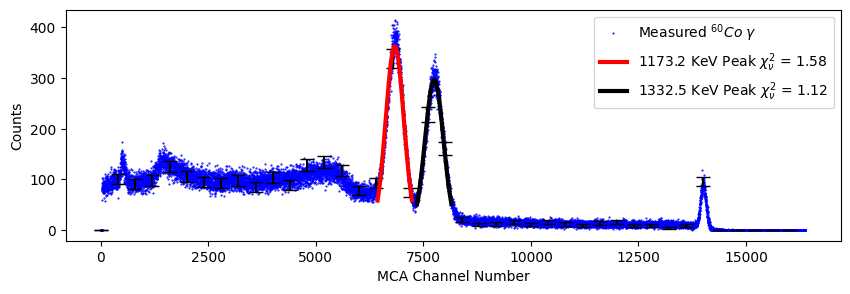

In [131]:
co60files = glob.glob('Gp3_data_E1/co60/*.csv')
with open("co60Fits.csv", "w") as fp:
    fp.write("Peak1,Peak1Error,Peak2,Peak2Error\n")
    j = 0
    data = pd.read_csv(co60files[0], skiprows=6)
    for co60file in co60files[1:]:
        d1= pd.read_csv(co60file, skiprows=6)
        #using poisson errors
        data["Counts"] += d1["Counts"]
    data["uncs"] = np.sqrt(data["Counts"]) + 1e-9
    plt.figure(figsize=(10, 3))
    p0s = [[400, 6840, 175], [350, 7750, 250]]
    plt.plot(data["Channel"], data["Counts"],'bo', label=r"Measured $^{60}Co$ $\gamma$", markersize=0.5)
    plt.errorbar(data["Channel"][::400], data["Counts"][::400], yerr=data["uncs"][::400], fmt='ko', markersize=0.001, capsize=5)
    plt.legend()
    plt.xlabel('MCA Channel Number')
    plt.ylabel('Counts')
    plt.savefig(f"plots/raw/co60_raw.svg", bbox_inches='tight')
    labels = ["1173.2 KeV Peak", "1332.5 KeV Peak"]
    colors = ["r-", "k-"]
    for i, p0 in enumerate(p0s):
        print(p0)
        bounds = [[p0[0]-100, p0[1]-200, p0[2]-200], [p0[0]+100, p0[1]+200, p0[2]+200]]
        popt, pcov = curve_fit(gaussFit, data["Channel"].to_numpy()[p0[1]-400:p0[1]+400], data["Counts"].to_numpy()[p0[1]-400:p0[1]+400], p0=p0, bounds=bounds, sigma=data["uncs"].to_numpy()[p0[1]-400:p0[1]+400], absolute_sigma=True)
        print(popt)
        centre = popt[1]
        error = popt[2]
        chisqaure = np.sum((gaussFit(data["Channel"][int(centre)-400:int(centre)+400], *popt) - data["Counts"][int(centre)-400:int(centre)+400])**2 / data["uncs"][int(centre)-400:int(centre)+400]**2)/(len(data["uncs"][int(centre)-400:int(centre)+400])-3)
        label = labels[i] + rf" $\chi^2_\nu$ = {chisqaure:.2f}"
        # error = np.sqrt(np.diag(pcov))[1]
        if i == 0:
            fp.write(f"{centre},{error}")

        else:
            fp.write(f",{centre},{error}")
        
        print(f"Centre: {centre} +/- {error}")
        plt.plot(data["Channel"][int(centre)-400:int(centre)+400], gaussFit(data["Channel"][int(centre)-400:int(centre)+400], *popt), colors[i], linewidth=3, label=label)
    plt.legend()
    # plt.xlabel('MCA Channel Number')
    # plt.ylabel('Counts')
    plt.savefig(f"plots/co60_fit.svg", bbox_inches='tight')
    plt.show()



[10334.74430343  2900.23981894   226.52714673]
Centre: 2900.239818941812 +/- 226.52714672858946
[1540.29681216 7348.48714017  327.14115514]
Centre: 7348.487140165147 +/- 327.14115514077264
[  936.35359442 10516.60399417   272.26227239]
Centre: 10516.603994173272 +/- 272.2622723949626


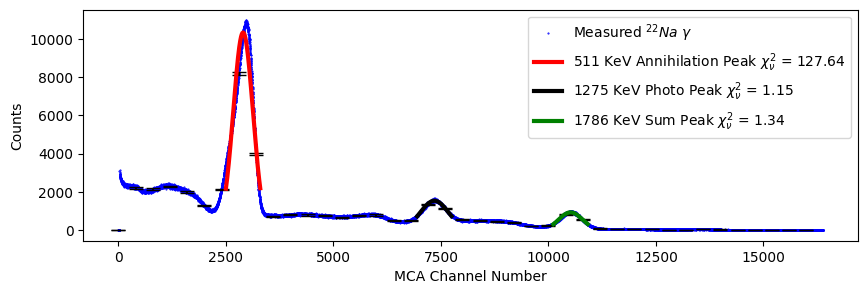

In [132]:
co60files = glob.glob('Gp3_data_E1/na22/*.csv')
with open("na22Fits.csv", "w") as fp:
    fp.write("Peak1,Peak1Error,Peak2,Peak2Error,Peak3,Peak3Error\n")
    data = pd.read_csv(co60files[0], skiprows=6)
    for co60file in co60files[1:]:
        d1= pd.read_csv(co60file, skiprows=6)
        #using poisson errors
        data["Counts"] += d1["Counts"]
    data["uncs"] = np.sqrt(data["Counts"]) + 1e-9
       
    plt.figure(figsize=(10, 3))
    p0s = [[11000, 2900, 300], [2000, 7350, 300], [1500, 10500, 300]]
    plt.plot(data["Channel"], data["Counts"],'bo', label=r"Measured $^{22}Na$ $\gamma$", markersize=0.5)
    plt.errorbar(data["Channel"][::400], data["Counts"][::400], yerr=data["uncs"][::400], fmt='ko', markersize=0.001, capsize=5)
    plt.legend()
    plt.xlabel('MCA Channel Number')
    plt.ylabel('Counts')
    plt.savefig(f"plots/raw/na22_raw.svg", bbox_inches='tight')
    labels = ["511 KeV Annihilation Peak", "1275 KeV Photo Peak", "1786 KeV Sum Peak"]
    colors = ["r-", "k-", "g-"]
    for i, p0 in enumerate(p0s):
        bounds = [[p0[0]-2000, p0[1]-500, p0[2]-200], [p0[0]+2000, p0[1]+500, p0[2]+200]]
        popt, pcov = curve_fit(gaussFit, data["Channel"].to_numpy()[p0[1]-400:p0[1]+400], data["Counts"].to_numpy()[p0[1]-400:p0[1]+400], p0=p0, bounds=bounds, sigma=data["uncs"].to_numpy()[p0[1]-400:p0[1]+400], absolute_sigma=True)
        print(popt)
        centre = popt[1]
        error = popt[2]
        chisqaure = np.sum((gaussFit(data["Channel"][int(centre)-400:int(centre)+400], *popt) - data["Counts"][int(centre)-400:int(centre)+400])**2 / data["uncs"][int(centre)-400:int(centre)+400]**2)/(len(data["uncs"][int(centre)-400:int(centre)+400])-3)
        label = labels[i] + rf" $\chi^2_\nu$ = {chisqaure:.2f}"
        # error = np.sqrt(np.diag(pcov))[1]
        if i == 0:
            fp.write(f"{centre},{error}")
        else:
            fp.write(f",{centre},{error}")
        
        print(f"Centre: {centre} +/- {error}")
        plt.plot(data["Channel"][int(centre)-400:int(centre)+400], gaussFit(data["Channel"][int(centre)-400:int(centre)+400], *popt), colors[i], linewidth=3, label=label)
    plt.legend()
    plt.xlabel('MCA Channel Number')
    plt.ylabel('Counts')
    plt.savefig(f"plots/na22_fit.svg", bbox_inches='tight')
    j+=1
    plt.show()
    fp.write("\n")


[8000, 1110, 500]
[7965.90327155 1079.78770236  490.22964405]
Centre: 1079.7877023585554 +/- 490.22964404916485
[5500, 2850, 600]
[4635.06093911 2805.53051718  690.92473062]
Centre: 2805.530517180874 +/- 690.9247306220149
[3000, 5160, 450]
[3056.99120897 5123.39183651  555.44027642]
Centre: 5123.391836506595 +/- 555.4402764248067


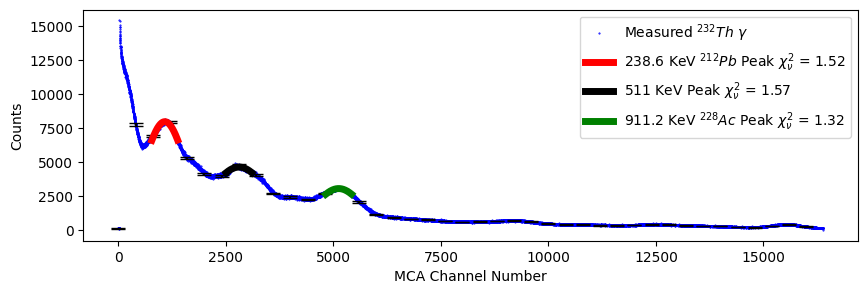

In [133]:
co60files = glob.glob('Gp3_data_E1/th02/*.csv')
with open("th232Fits.csv", "w") as fp:
    fp.write("Peak1,Peak1Error,Peak2,Peak2Error,Peak3,Peak3Error\n")
    j=0
    data = pd.read_csv(co60files[0], skiprows=6)
    for co60file in co60files[1:]:
        d1= pd.read_csv(co60file, skiprows=6)
        #using poisson errors
        data["Counts"] += d1["Counts"]
    data["uncs"] = np.sqrt(data["Counts"]) + 1e-9
    plt.figure(figsize=(10, 3))
    plt.plot(data["Channel"], data["Counts"],'bo', label=r"Measured $^{232}Th$ $\gamma$", markersize=0.5)
    plt.errorbar(data["Channel"][::400], data["Counts"][::400], yerr=data["uncs"][::400], fmt='ko', markersize=0.001, capsize=5)
    plt.legend()
    plt.xlabel('MCA Channel Number')
    plt.ylabel('Counts')
    plt.savefig(f"plots/raw/th232_raw.svg", bbox_inches='tight')
    p0s = [[8000, 1110, 500], [5500, 2850, 600], [3000, 5160, 450]]
    labels = [r"238.6 KeV $^{212}Pb$ Peak", r"511 KeV Peak", r"911.2 KeV $^{228}Ac$ Peak"]
    colors = ["r-", "k-", "g-"]
    for i, p0 in enumerate(p0s):
        print(p0)
        bounds = [[p0[0]-1500, p0[1]-200, p0[2]-200], [p0[0]+1500, p0[1]+200, p0[2]+200]]
        popt, pcov = curve_fit(gaussFit, data["Channel"].to_numpy()[p0[1]-300:p0[1]+300], data["Counts"].to_numpy()[p0[1]-300:p0[1]+300], p0=p0, bounds=bounds, sigma=data["uncs"].to_numpy()[p0[1]-300:p0[1]+300], absolute_sigma=True)
        print(popt)
        centre = popt[1]
        error = popt[2]
        chisqaure = np.sum((gaussFit(data["Channel"][int(centre)-300:int(centre)+300], *popt) - data["Counts"][int(centre)-300:int(centre)+300])**2 / data["uncs"][int(centre)-300:int(centre)+300]**2)/(len(data["uncs"][int(centre)-300:int(centre)+300])-3)
        label = labels[i] + rf" $\chi^2_\nu$ = {chisqaure:.2f}"
        # error = np.sqrt(np.diag(pcov))[1]
        if i == 0:
            fp.write(f"{centre},{error}")
        else:
            fp.write(f",{centre},{error}")
        
        print(f"Centre: {centre} +/- {error}")
        plt.plot(data["Channel"][int(centre)-300:int(centre)+300], gaussFit(data["Channel"][int(centre)-300:int(centre)+300], *popt), colors[i], linewidth=5 , label=label)
    plt.legend()
    plt.xlabel('MCA Channel Number')
    plt.ylabel('Counts')
    plt.savefig(f"plots/th232_fit.svg", bbox_inches='tight')
    j+=1
    plt.show()
    fp.write("\n")

[32000, 3060, 350]
[31397.20558662  3058.74048147   402.95254501]
Centre: 3058.7404814654533 +/- 402.95254501354697
Centre: 3058.7404814654533 +/- 402.95254501354697


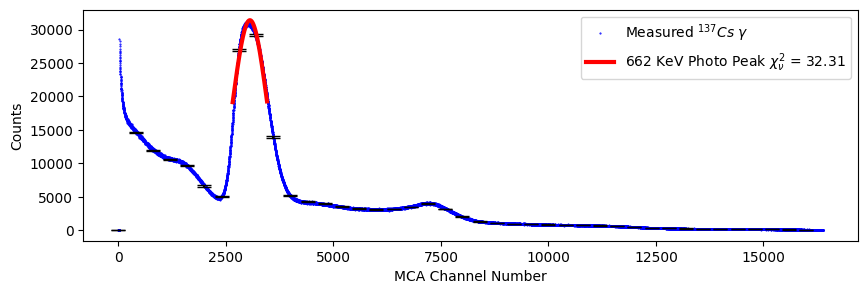

: 

In [ ]:
co60files = glob.glob('Gp3_data_E1/cs137/*.csv')
with open("cs137Fits.csv", "w") as fp:
    fp.write("Peak1,Peak1Error,Peak2,Peak2Error,Peak3,Peak3Error\n")
    j=0
    data = pd.read_csv(co60files[0], skiprows=6)
    for co60file in co60files[1:]:
        d1= pd.read_csv(co60file, skiprows=6)
        #using poisson errors
        data["Counts"] += d1["Counts"]
    data["uncs"] = np.sqrt(data["Counts"]) + 1e-9
    plt.figure(figsize=(10, 3))
    plt.plot(data["Channel"], data["Counts"],'bo', label=r"Measured $^{137}Cs$ $\gamma$", markersize=0.5)
    plt.errorbar(data["Channel"][::400], data["Counts"][::400], yerr=data["uncs"][::400], fmt='ko', markersize=0.001, capsize=5)
    plt.legend()
    plt.xlabel('MCA Channel Number')
    plt.ylabel('Counts')
    plt.savefig(f"plots/raw/cs137_raw.svg", bbox_inches='tight')
    p0s = [[32000, 3060, 350]]
    labels = [r"662 KeV Photo Peak"]
    for i, p0 in enumerate(p0s):
        print(p0)
        bounds = [[p0[0]-1500, p0[1]-200, p0[2]-200], [p0[0]+1500, p0[1]+200, p0[2]+200]]
        popt, pcov = curve_fit(gaussFit, data["Channel"].to_numpy()[p0[1]-400:p0[1]+400], data["Counts"].to_numpy()[p0[1]-400:p0[1]+400], p0=p0, bounds=bounds, sigma=data["uncs"].to_numpy()[p0[1]-400:p0[1]+400], absolute_sigma=True)
        print(popt)
        centre = popt[1]
        error=popt[2]
        # error = np.sqrt(np.diag(pcov))[1]
        if i == 0:
            fp.write(f"{centre},{error}")
        else:
            fp.write(f",{centre},{error}")
        chisqaure = np.sum((gaussFit(data["Channel"][int(centre)-400:int(centre)+400], *popt) - data["Counts"][int(centre)-400:int(centre)+400])**2 / data["uncs"][int(centre)-400:int(centre)+400]**2)/(len(data["uncs"][int(centre)-400:int(centre)+400])-3)
        label = labels[i] + rf" $\chi^2_\nu$ = {chisqaure:.2f}"
        print(f"Centre: {centre} +/- {error}")
        print(f"Centre: {centre} +/- {error}")
        plt.plot(data["Channel"][int(centre)-400:int(centre)+400], gaussFit(data["Channel"][int(centre)-400:int(centre)+400], *popt), colors[i], linewidth=3, label=label)
    plt.legend()
    plt.xlabel('MCA Channel Number')
    plt.ylabel('Counts')
    plt.savefig(f"plots/cs137_fit.svg", bbox_inches='tight')
    j+=1
    plt.show()
    fp.write("\n")